In [10]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

In [112]:
dir_path = '../Data/carbon_data//'
data_name = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        data_name.append(folder+'/'+img)
print(len(data_name))

2402


In [113]:
print(data_name[:3])

['../Data/carbon_data/pet//image_cropper_16774497760331677449796909.jpg', '../Data/carbon_data/pet//20220724_0731021658619358860.jpg', '../Data/carbon_data/pet//image_cropper_16580539933981658054014362.jpg']


In [117]:
origin = A.Compose(
    [
        A.Resize(height = 260+80, width = 260+80),
        A.CenterCrop(always_apply=True, p=1.0, height=260, width=260),
        ])
transform = A.Compose(
    [
        A.RandomResizedCrop(height=260 ,width=260, scale=(0.65, 0.85),ratio=(0.90, 1.10), p=1),
        A.HorizontalFlip(p=0.5),
        # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0),
        # A.pytorch.transforms.ToTensorV2()
        ])

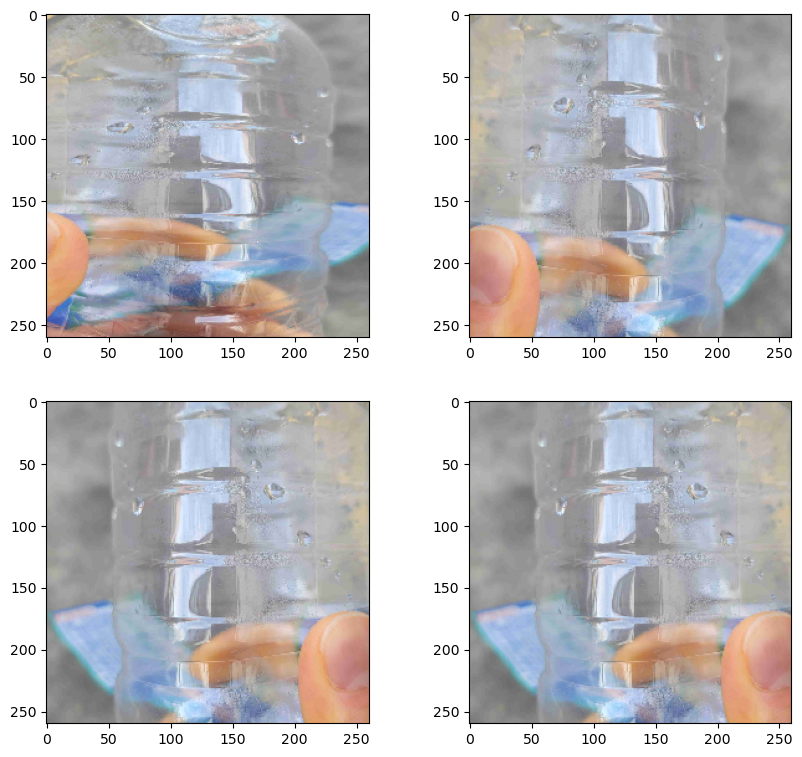

In [118]:
test_img = data_name[100]

plt.figure(figsize=(10,200))
im_bgr = cv2.imread(test_img)
img = im_bgr[:, :, ::-1]
plt.subplot(40,2,1)
plt.imshow(origin(image=img)['image'], cmap=plt.cm.binary)
for i in range(1,4):
    plt.grid(False)
    plt.subplot(40,2,i+1)
    plt.imshow(transform(image=img)["image"], cmap=plt.cm.binary)

plt.show()

In [107]:
## show img status
plt.figure(figsize=(16,500))
for i in range(len(data_name[:100])):
    plt.subplot(100,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
        
    path = data_name[i+400]
    try:
        temp = Image.open(path).convert("RGB")
        image = np.array(temp).copy()
        temp.close()
        plt.xlabel(data_name, loc='left', fontsize=10)
        plt.imshow(image, cmap=plt.cm.binary)
    except:
        plt.xlabel(path, loc='left', fontsize=10)
        
plt.show()


KeyboardInterrupt



In [41]:
disaster_img = pd.DataFrame(img_names, columns=['image_id'])
disaster_img['dir'] = disaster_img['image_id'].apply(lambda x: os.path.dirname(x))
disaster_img['image_id'] = disaster_img['image_id'].apply(lambda x: os.path.basename(x))

disaster_img

,image_id,dir
0,1b24087aa0f9867b.jpg,../Data/disaster/train/origin_images/open_imag...
1,2b3651e8ba31ee65.jpg,../Data/disaster/train/origin_images/open_imag...
2,ecfe8082bc0a55ca.jpg,../Data/disaster/train/origin_images/open_imag...
3,eaa910f252495a1c.jpg,../Data/disaster/train/origin_images/open_imag...
4,17dba0da31436843.jpg,../Data/disaster/train/origin_images/open_imag...
...,...,...
1650,122156386.jpg,../Data/disaster/train/origin_images/flickr30k...
1651,4130537606.jpg,../Data/disaster/train/origin_images/flickr30k...
1652,4922742734.jpg,../Data/disaster/train/origin_images/flickr30k...
1653,3445296377.jpg,../Data/disaster/train/origin_images/flickr30k...


In [8]:
disaster_img.loc[0]['image_id']

'1b24087aa0f9867b.jpg'

In [25]:
real_img = disaster_img.loc[0]['dir'] +'/'+ disaster_img.loc[0]['image_id']
real_img

'../Data/disaster_images/open_image_disaster/1b24087aa0f9867b.jpg'

In [22]:
disaster_img.dir.iloc[0]

'../Data/disaster_images/open_image_disaster'

#### Randomly augmented images save

In [36]:
save_path = '../Data/disaster/augmented/'

k = 4
for i in range(len(disaster_img)):
    image_id = disaster_img.loc[i]['image_id']
    real_img = disaster_img.loc[i]['dir']  +'/'+ image_id
    im_bgr = cv2.imread(real_img)
    img = im_bgr[:, :, ::-1]
    
    ## origin
    trans_img = transform_o(image=img)['image']
    img_array = Image.fromarray(trans_img.astype(np.uint8))
    img_array.save(os.path.join(save_path, f"{image_id[:-4]}_00.jpg"))
    
    for j in range(1,k):
        trans_img = transform(image=img)['image']
        img_array = Image.fromarray(trans_img.astype(np.uint8))
        img_array.save(os.path.join(save_path, f"{image_id[:-4]}_0{j}.jpg"))


#### saparately augmented images save

In [48]:
transform = A.Compose([
    A.Resize(height = 512, width = 512),
    #A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(0.00, 0.00), contrast_limit=(0.2, 0.2), brightness_by_max=False),
    #A.SafeRotate(always_apply=True, p=1.0, limit=(-20, 20), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    #A.HorizontalFlip(always_apply=True, p=1.0),
    A.CenterCrop(always_apply=True, p=1.0, height=256, width=256)
    #    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0)
    #A.pytorch.transforms.ToTensorV2()
])

In [49]:
main_path = '../Data/disaster/train/augmented/'
aug = 'CenterCrop'

save_path = main_path + aug
if not os.path.exists(save_path):
    os.makedirs(save_path)


for i in range(len(disaster_img)):
    image_id = disaster_img.loc[i]['image_id']
    real_img = disaster_img.loc[i]['dir']  +'/'+ image_id
    im_bgr = cv2.imread(real_img)
    try:
        img = im_bgr[:, :, ::-1]
    except:
        img = im_bgr
        print(disaster_img.loc[i]['image_id'])

    trans_img = transform(image=img)['image']
    img_array = Image.fromarray(trans_img.astype(np.uint8))
    img_array.save(os.path.join(save_path, f"{image_id[:-4]}_{aug}.jpg"))
    

libpng warning: iCCP: known incorrect sRGB profile


In [50]:
dir_path =  '../Data/disaster/train/augmented'

augmented = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        augmented.append(folder+'/'+img)
print(len(augmented))

6620
